## Лабораторна робота 5. **CLASSIFICATION** 🔵/🔺

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

# Опис вибірки "bank-additional-full"

   # Input variables:
   `bank client data:`  
   1 - **age** (numeric)  
   2 - **job** : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
   3 - **marital** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
   4 - **education** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
   5 - **default**: has credit in default? (categorical: "no","yes","unknown")  
   6 - **housing**: has housing loan? (categorical: "no","yes","unknown")  
   7 - **loan**: has personal loan? (categorical: "no","yes","unknown")  
   # related with the last contact of the current campaign:  
   8 - **contact**: contact communication type (categorical: "cellular","telephone")   
   9 - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - **duration**: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
   # other attributes:  
  12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - **previous**: number of contacts performed before this campaign and for this client (numeric) 
  15 - **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
   # social and economic context attributes  
  16 - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)  
  17 - **cons.price.idx**: consumer price index - monthly indicator (numeric)       
  18 - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)       
  19 - **euribor3m**: euribor 3 month rate - daily indicator (numeric)  
  20 - **nr.employed**: number of employees - quarterly indicator (numeric)  
    
   `Output variable (desired target):`  
  21 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `bank-additional-full.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. вивести розмірність датасету.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snsX
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

df = pd.read_csv("bank-additional-full.csv", sep=";")

print("Statistical summary of numeric variables:")
print(df.describe())

print("Dataset shape:")
print(df.shape)


Statistical summary of numeric variables:
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1

**Завдання 2** підготовка цільової змінної  

1. проаналізувати атрибути вибірки, визначити цільовий атрибут `target atribute`;
2. якщо `target atribute` є категоріальним, його необхідно перетворити в чисельний.

In [96]:
import pandas as pd

df = pd.read_csv("bank-additional-full.csv", sep=";")

print(df.columns)
df['y'] = df['y'].map({'yes': 1, 'no': 0})
print("Unique values in the 'y' column after transformation", df['y'].unique())
print(df["y"].value_counts())


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
Unique values in the 'y' column after transformation [0 1]
y
0    36548
1     4640
Name: count, dtype: int64


## Аналіз змінних, які характеризують клієнтів банку:

**Завдання 3** Визначитись зі всіма атрибутами, що характреризують кліентів банку:
- виділити їх в окрему частину;
- первірити всі змінні (які унікальні значення містять атрибути)(дивись опис датасету).

In [16]:
import pandas as pd

df = pd.read_csv("bank-additional-full.csv", sep=";")
client_attributes = df.drop(columns=["y"])  
for col in client_attributes.columns:
    print(f"{col}: {df[col].unique()[:10]}")  


age: [56 57 37 40 45 59 41 24 25 29]
job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default: ['no' 'unknown' 'yes']
housing: ['no' 'yes' 'unknown']
loan: ['no' 'yes' 'unknown']
contact: ['telephone' 'cellular']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
duration: [261 149 226 151 307 198 139 217 380  50]
campaign: [ 1  2  3  4  5  6  7  8  9 10]
pdays: [999   6   4   3   5   1   0  10   7   8]
previous: [0 1 2 3 4 5 6 7]
poutcome: ['nonexistent' 'failure' 'success']
emp.var.rate: [ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
cons.price.idx: [93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893]
cons.conf.idx: [-36.4 -41.8 -42.7 -36.1 -40.4

**Завдання 4** Аналіз атрибуту `Age`:  
1. Вивести максимальне та мінімальне значення;  
2. Перевірити на наявність `NaN`;  
3. Провести візуальний аналіз зміної `Age`:
    - побудувати `countplot`, `boxplot`, `distplot`;
    - перевірити розподіл по змінній `Age` на важкі хвости.

Minimum age value: 17
Maximum age value: 98
Number of NaN values in 'age' column: 0


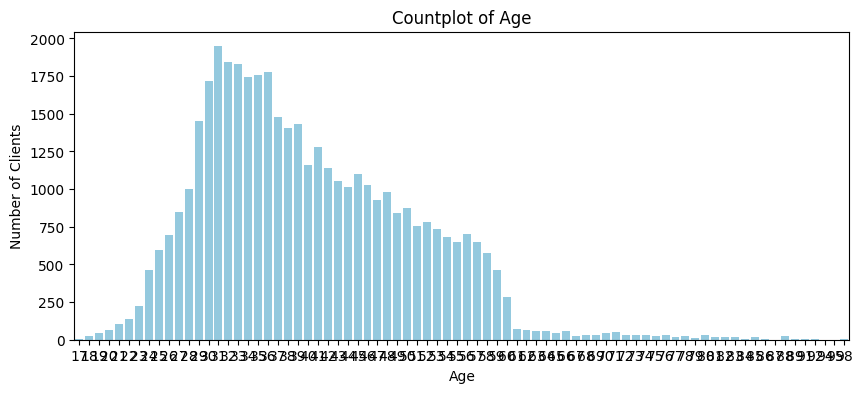

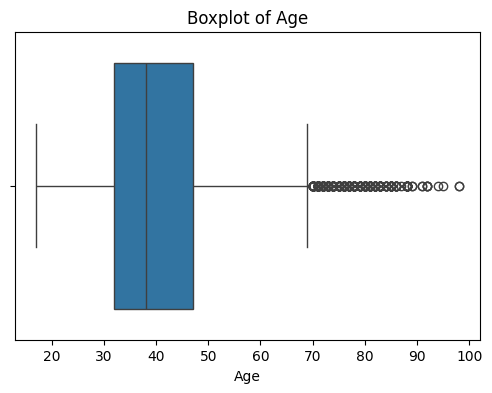

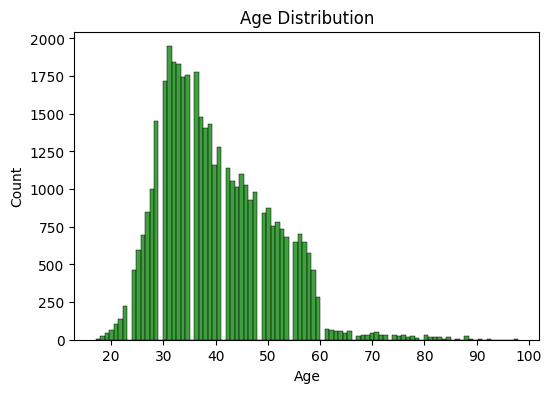

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("bank-additional-full.csv", sep=";")

min_age = df['age'].min()
max_age = df['age'].max()
print(f"Minimum age value: {min_age}")
print(f"Maximum age value: {max_age}")

nan_count = df['age'].isna().sum()
print(f"Number of NaN values in 'age' column: {nan_count}")

plt.figure(figsize=(10, 4))
sns.countplot(x='age', data=df, color='skyblue')
plt.title('Countplot of Age')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x='age', data=df)
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df['age'], color='green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


**Висновки з 1-4 завдання (детальні)**

Count Plot of Age: демонструє, що найбільша кількість клієнтів зосереджена у віковому діапазоні від приблизно 30 до 40 років, із поступовим спадом у міру збільшення віку.

Box Plot of Age: вказує на середнє значення близько 39–40 років, помірну кількість викидів у старшому віці та відсутність суттєвих аномалій у молодшій групі.

Distribution Plot of Age: підтверджує правосторонню асиметрію розподілу з максимумом у зоні 30–40 років і поступовим зниженням кількості клієнтів у старшому віці.

**Завдання 5** Перевірити атрибут `Age` на викиди: 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def detect_outliers_with_interquantile_range(df: pd.DataFrame, col: str,low_percentile: int, high_percentile: int) -> pd.DataFrame:
    """
    Detect outliers using the Interquartile Range (IQR) method.
    
    Parameters:
    -----------
    df : pd.DataFrame
        The DataFrame containing the data.
    col : str
        The name of the column to analyze.
    low_percentile : int
        The lower percentile to display (does not affect the IQR calculation).
    high_percentile : int
        The upper percentile to display (does not affect the IQR calculation).
    
    Returns:
    --------
    outliers : pd.DataFrame
        A DataFrame containing the rows identified as outliers based on IQR.
    """
    
    sorted_data = np.sort(df[col])

    low_val = np.percentile(sorted_data, low_percentile)
    high_val = np.percentile(sorted_data, high_percentile)
    print(f"{low_percentile}th percentile of {col}: {low_val}")
    print(f"{high_percentile}th percentile of {col}: {high_val}")

    q1 = np.percentile(sorted_data, 25)
    q3 = np.percentile(sorted_data, 75)
    iqr = q3 - q1
    print(f"Interquartile Range (IQR) for {col}: {iqr}")

    low_lim = q1 - 1.5 * iqr
    up_lim = q3 + 1.5 * iqr
    print(f"Lower limit (1.5 * IQR below Q1): {low_lim}")
    print(f"Upper limit (1.5 * IQR above Q3): {up_lim}")

    outliers = df[(df[col] < low_lim) | (df[col] > up_lim)]
    print(f"\nNumber of outliers found in {col}: {len(outliers)}")

    return outliers

df = pd.read_csv("bank-additional-full.csv", sep=";")

column_to_check = 'age'

outliers_df = detect_outliers_with_interquantile_range(df, column_to_check, 10, 90)

print(outliers_df.head())


10th percentile of age: 28.0
90th percentile of age: 55.0

Interquartile Range (IQR) for age: 15.0
Lower limit (1.5 * IQR below Q1): 9.5
Upper limit (1.5 * IQR above Q3): 69.5

Number of outliers found in age: 469
       age      job   marital          education default housing loan  \
27713   70  retired  divorced           basic.4y      no     yes   no   
27757   76  retired   married  university.degree      no      no  yes   
27780   73  retired   married  university.degree      no     yes   no   
27800   88  retired  divorced           basic.4y      no     yes   no   
27802   88  retired  divorced           basic.4y      no      no   no   

        contact month day_of_week  duration  campaign  pdays  previous  \
27713  cellular   mar         mon       187         3    999         0   
27757  cellular   mar         thu       167         9    999         0   
27780  cellular   mar         tue       179         1    999         1   
27800  cellular   mar         wed        48        

In [ ]:
outliers = detect_outliers_with_interquantile_range(bank_client, 'age', 10, 90)

**Висновки з завдання 5 (детальні)**

Клієнти з віком більще 70 років (загалом 469) є викидами, що підтверджує наявність аномально старших значень за межами нормального діапазону (9.5–69.5).

**Завдання 6** Аналіз атрибутів `job`, `marital` та `education`:  
- Побудувати графіки розподілу даних по цим змінним.

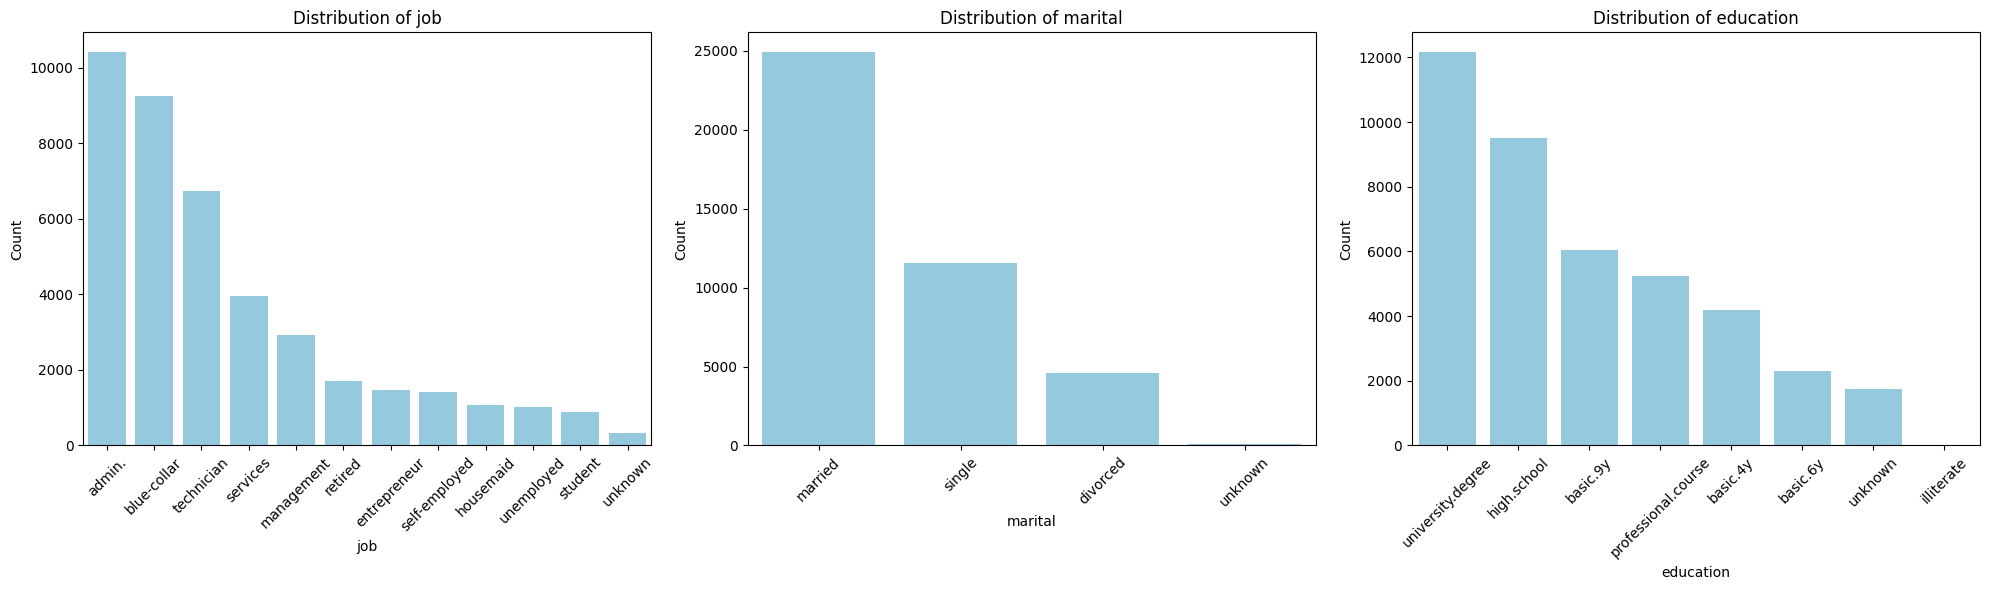

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("bank-additional-full.csv", sep=";")

categorical_columns = ["job", "marital", "education"]

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, col in enumerate(categorical_columns):
    sns.countplot(
        ax=axes[i],
        x=col,
        data=df,
        color='skyblue',
        order=df[col].value_counts().index  
    )
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show()


In [ ]:
#code

In [ ]:
#code

**Висновки з завдання 6 (детальні)**

Distribution of job: найбільшу частку становлять клієнти з роботою типу "admin." та "blue-collar", помітно менше в інших категоріях.

Distribution of marital: переважає група "married", тоді як "single" та "divorced" трапляються рідше.

Distribution of education: найчастіше зустрічається "university.degree", а "high.school" посідає друге місце за популярністю.

**Завдання 7** Аналіз атрибутів `default`, `housing` та `loan`:  
- Побудувати графіки розподілу даних по цим змінним.

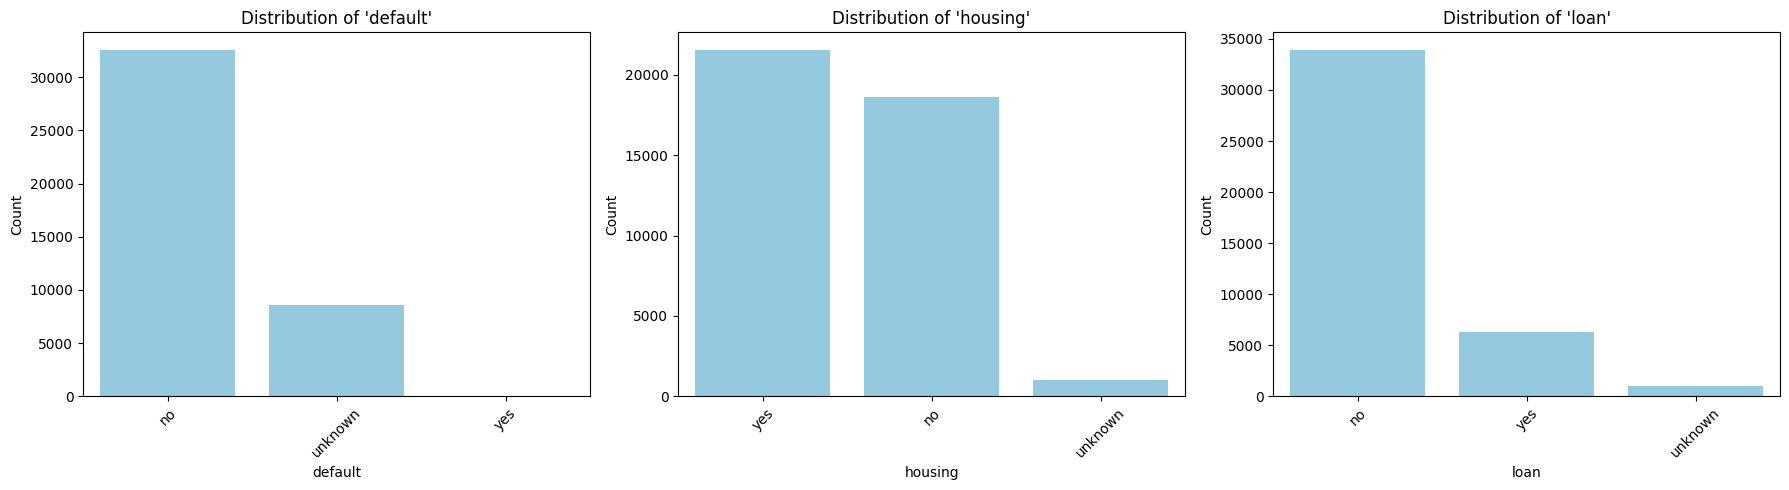

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("bank-additional-full.csv", sep=";")

categorical_cols = ["default", "housing", "loan"]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i], color='skyblue',
                  order=df[col].value_counts().index)
    axes[i].set_title(f"Distribution of '{col}'")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
#code

In [ ]:
#code

**Завдання 8** Змінні **Jobs, Marital, Education, Default, Housing, Loan** трансформувати в неперервні змінні:

In [65]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using LabelEncoder.

    Parameters:
    -----------
    df : pd.DataFrame
        The DataFrame containing the data.
    categorical_cols : list
        A list of column names (categorical) to be encoded.

    Returns:
    --------
    df : pd.DataFrame
        The same DataFrame with encoded categorical values.
    """
    for col in categorical_cols:
        le = LabelEncoder()
        not_null = df[col].notnull()
        
        df.loc[not_null, col] = le.fit_transform(df.loc[not_null, col].astype(str))
        
    return df

bank_client = pd.read_csv("bank-additional-full.csv", sep=";")

bank_client = encode_categorical_columns(
    bank_client,
    ["job", "marital", "education", "default", "housing", "loan"]
)

print(bank_client[["job", "marital", "education", "default", "housing", "loan"]].head())


  job marital education default housing loan
0   3       1         0       0       0    0
1   7       1         3       1       0    0
2   7       1         3       0       2    0
3   0       1         1       0       0    0
4   7       1         3       0       0    2


In [ ]:
bank_client = encode_categorical_columns(bank_client, ['job', 'marital', 'education', 'default', 'housing',  'loan'])

**Завдання 9** Трансфомувати змінну **Age** (використовуючи її квартильні значення):




In [73]:
import pandas as pd

def encode_age(dataframe: pd.DataFrame, age_col: str) -> pd.DataFrame:
    """
    Function for encoding the 'age' column using its quartile values.
    
    Parameters:
    -----------
    dataframe : pd.DataFrame
        The DataFrame containing the data.
    age_col : str
        The name of the 'age' column to be transformed.
    
    Returns:
    --------
    dataframe : pd.DataFrame
        The modified DataFrame with a new column 'age_category',
        which bins the original 'age' values into quartile-based categories.
    """

    q1 = dataframe[age_col].quantile(0.25)
    q2 = dataframe[age_col].quantile(0.50) 
    q3 = dataframe[age_col].quantile(0.75)
    
    age_min = dataframe[age_col].min()
    age_max = dataframe[age_col].max()
    bins = [age_min, q1, q2, q3, age_max]
    
    labels = ["Young", "Young Adult", "Adult", "Senior"]
    
    dataframe["age_category"] = pd.cut(
        dataframe[age_col],
        bins=bins,
        labels=labels,
        include_lowest=True
    )
    
    return dataframe

bank_client = pd.read_csv("bank-additional-full.csv", sep=";")
bank_client = encode_age(bank_client, 'age')
print(bank_client[['age', 'age_category']].head(10))


   age age_category
0   56       Senior
1   57       Senior
2   37  Young Adult
3   40        Adult
4   56       Senior
5   45        Adult
6   59       Senior
7   41        Adult
8   24        Young
9   25        Young


In [ ]:
bank_client = encode_age(bank_client, 'age')

**Висновки з завдання 9 (детальні)** перевірити як відбулося перетворення змінних

Young (18–29), Young Adult (30–39), Senior (55–99), Adult (40–54)

## Вибірка містить певну кількість атрибутів, які характеризують останій зв'язок кліентів з банком

**Завдання 10** Виділити в окремий датафрейм змінні, які характеризують зв'язок клієнтів з банком;
- вивести цей датафрейм;
- перевірити ці змінні на `NaN`.

In [78]:
import pandas as pd

df = pd.read_csv("bank-additional-full.csv", sep=";")

contact_cols = ['contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome']

bank_contact_df = df[contact_cols]

print(bank_contact_df.head())

nan_counts = bank_contact_df.isna().sum()
print("Missing values:")
print(nan_counts)


     contact month day_of_week  campaign  pdays  previous     poutcome
0  telephone   may         mon         1    999         0  nonexistent
1  telephone   may         mon         1    999         0  nonexistent
2  telephone   may         mon         1    999         0  nonexistent
3  telephone   may         mon         1    999         0  nonexistent
4  telephone   may         mon         1    999         0  nonexistent
Missing values:
contact        0
month          0
day_of_week    0
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64


**Завдання 11** вивести унікальні значення, які містять атрибути `contact`, `month`, `day_of_week`

In [22]:
import pandas as pd

df = pd.read_csv("bank-additional-full.csv", sep=";")

print("Unique values in 'contact':", df['contact'].unique())
print("Unique values in 'month':", df['month'].unique())
print("Unique values in 'day_of_week':", df['day_of_week'].unique())


Unique values in 'contact': ['telephone' 'cellular']
Unique values in 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Unique values in 'day_of_week': ['mon' 'tue' 'wed' 'thu' 'fri']


# Провести аналіз змінної **Duration**

змінна ` duration` містить інформацію про тривалість останнього дзвінка, в секундах (числова). Важливе зауваження: цей атрибут сильно впливає на цільову змінну (наприклад, якщо тривалість = 0, тоді y = "ні"). Проте тривалість невідома до здійснення дзвінка. Крім того, після закінчення дзвінка y, очевидно, відомо. Таким чином, цей внесок слід включати лише для цілей порівняльних показників і відкидати, якщо метою є реалістична модель прогнозування.

**Завдання 12** Аналіз атрибуту `duration`:  

Провести візуальний аналіз зміної `duration`:  


*   побудувати  `boxplot` та `distplot`; 
*   перевірити розподіл по змінній `duration` на важкі хвости. 



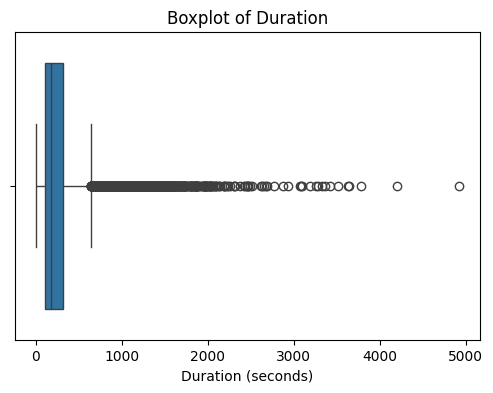

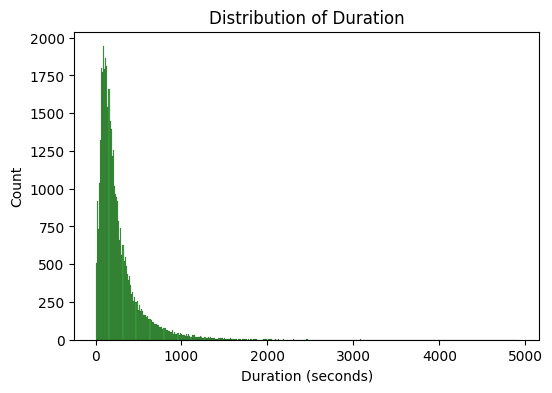

Skewness of 'duration': 3.263141255262832
Kurtosis of 'duration': 20.247938014978796


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("bank-additional-full.csv", sep=";")

plt.figure(figsize=(6, 4))
sns.boxplot(x='duration', data=df)
plt.title('Boxplot of Duration')
plt.xlabel('Duration (seconds)')
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df['duration'], color='green')
plt.title('Distribution of Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.show()

skewness = df['duration'].skew()
kurtosis = df['duration'].kurt()
print(f"Skewness of 'duration': {skewness}")
print(f"Kurtosis of 'duration': {kurtosis}")


**Завдання 13** Закодувати змінні Contact, Month, Day of Week (використовуйте функцію `encode_categorical_columns()`)

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

csv_file_path = "bank-additional-full.csv"
df = pd.read_csv(csv_file_path, sep=";")
def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using LabelEncoder.

    df: pd.DataFrame to encode
    categorical_cols: specified columns to encode

    returns: pd.DataFrame with encoded values
    """
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))  

    return df

categorical_features = ['contact', 'month', 'day_of_week']

df_encoded = encode_categorical_columns(df, categorical_features)

print(df_encoded[['contact', 'month', 'day_of_week']].head())


   contact  month  day_of_week
0        1      6            1
1        1      6            1
2        1      6            1
3        1      6            1
4        1      6            1


**Завдання 14** Трансфомувати змінну **duration**, використовуючи її квартильні значення:

In [ ]:
import pandas as pd

def encode_duration(dataframe: pd.DataFrame, duration_col: str) -> pd.DataFrame:
    """
    Function to encode the 'duration' column based on its quartile values,
    using min() and max() as the lower and upper boundaries.

    Parameters:
    -----------
    dataframe : pd.DataFrame
        The DataFrame containing the data.
    duration_col : str
        The name of the column to be transformed.

    Returns:
    --------
    dataframe : pd.DataFrame
        The modified DataFrame with a new column 'duration_category',
        which bins the original 'duration' values into four categories.
    """
    q1 = dataframe[duration_col].quantile(0.25)
    q2 = dataframe[duration_col].quantile(0.50) 
    q3 = dataframe[duration_col].quantile(0.75)

    duration_min = dataframe[duration_col].min()
    duration_max = dataframe[duration_col].max()

    bins = [duration_min, q1, q2, q3, duration_max]

    labels = ["Short", "Medium", "Long", "Very Long"]

    dataframe["duration_category"] = pd.cut(
        dataframe[duration_col],
        bins=bins,
        labels=labels,
        include_lowest=True
    )

    return dataframe
df = pd.read_csv("bank-additional-full.csv", sep=";")

df = encode_duration(df, "duration")
print(df[["duration", "duration_category"]].head(10))


   duration duration_category
0       261              Long
1       149            Medium
2       226              Long
3       151            Medium
4       307              Long
5       198              Long
6       139            Medium
7       217              Long
8       380         Very Long
9        50             Short


In [ ]:
bank_relat = encode_duration(bank_relat, 'duration')

## Провести аналіз атрибутів **соціального та економічного контексту**

**Завдання 15** Виділити в окремий датафрейм атрибути соціального та єкономічного контексту

In [44]:
import pandas as pd

df = pd.read_csv("bank-additional-full.csv", sep=";")

soc_econ_cols = [
    "emp.var.rate",
    "cons.price.idx",
    "cons.conf.idx",
    "euribor3m",
    "nr.employed"
]

soc_econ_df = df[soc_econ_cols]
print(soc_econ_df.head())


   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed
0           1.1          93.994          -36.4      4.857       5191.0
1           1.1          93.994          -36.4      4.857       5191.0
2           1.1          93.994          -36.4      4.857       5191.0
3           1.1          93.994          -36.4      4.857       5191.0
4           1.1          93.994          -36.4      4.857       5191.0


**Завдання 16** Виділити в окремий датафрейм всі інші атрибути атрибути - `campaign`, `pdays`,`previous`, `poutcome`

In [46]:
import pandas as pd

df = pd.read_csv("bank-additional-full.csv", sep=";")

campaign_cols = ["campaign", "pdays", "previous", "poutcome"]

campaign_df = df[campaign_cols]
print(campaign_df.head())


   campaign  pdays  previous     poutcome
0         1    999         0  nonexistent
1         1    999         0  nonexistent
2         1    999         0  nonexistent
3         1    999         0  nonexistent
4         1    999         0  nonexistent


**Завдання 17** Провести трансформацію атрибуту `poutcome`

In [50]:
import pandas as pd

df = pd.read_csv("bank-additional-full.csv", sep=";")

print("Unique values before:", df['poutcome'].unique())

mapping_dict = {
    "failure": 0,
    "nonexistent": 1,
    "success": 2
}

df['poutcome'] = df['poutcome'].map(mapping_dict)

print("Unique values:", df['poutcome'].unique())
print(df[['poutcome']].head(10))


Unique values before: ['nonexistent' 'failure' 'success']
Unique values: [1 0 2]
   poutcome
0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1


## Будування моделей класифікації

**Завдання 18** З'єднати всі отримані блоки в один датафрейм і перевірити, що він містить тільки потрібні для моделювання колонки

In [103]:
import pandas as pd

df = pd.read_csv("bank-additional-full.csv", sep=";")


bank_final = pd.concat(
    [bank_client,bank_contact_df, soc_econ_df, campaign_df, df[['y']]], 
    axis=1
)

print(bank_final.columns)
print(bank_final.shape)
print(bank_final.head())


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'age_category',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome',
       'y'],
      dtype='object')
(41188, 39)
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  ye

**Завдання 19** Провести ділення вибірки

In [149]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler


csv_file_path = "bank-additional-full.csv"  
bank_final = pd.read_csv(csv_file_path, sep=";")

print("bank_final:")
print(bank_final.head())


X = bank_final.drop(columns=["y"])
y = bank_final["y"]


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,        
    shuffle=True,
    random_state=42     
)

print("\nTrain set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


kf = KFold(
    n_splits=5,          
    shuffle=True,
    random_state=42
)

print("K-Fold splits (n_splits=5)")
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"  Fold {fold+1}:")
    print("    Train indices:", train_idx[:5], "...")
    print("    Val indices:  ", val_idx[:5], "...")
    pass


bank_final:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1

In [ ]:
X_train, X_test, y_train, y_test, k_fold = prepare_data_for_training(bank_final, target, 0.2, 10, 101)

In [ ]:
def scale_the_data(X_train: pd.DataFrame, 
                   X_test: pd.DataFrame):
  
  sc_X = StandardScaler()
  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)

  return X_train, X_test

In [ ]:
X_train, X_test = scale_the_data(X_train, X_test)

## Логістична Регресія

In [126]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

bank_final = pd.read_csv("bank-additional-full.csv", sep=";")

cat_cols = [
    "job", "marital", "education", "default", "housing", "loan",
    "contact", "month", "day_of_week", "poutcome"
]

bank_encoded = pd.get_dummies(bank_final, columns=cat_cols, drop_first=True)

X = bank_encoded.drop(columns=["y"])
y = bank_encoded["y"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.3,
    random_state=42,
    shuffle=True
)

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

y_pred = logmodel.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("\nAccuracy (Test Set):", round(acc, 3)*100, "%")


Confusion Matrix:
[[10685   283]
 [  801   588]]

Accuracy (Test Set): 91.2 %


## k-NN

In [150]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

csv_file_path = "bank-additional-full.csv"  
bank_final = pd.read_csv(csv_file_path, delimiter=";")

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in bank_final.select_dtypes(include=['object']).columns:
    bank_final[col] = label_encoder.fit_transform(bank_final[col].astype(str))

X = bank_final.drop(columns=['y']) 
y = bank_final['y']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

neighbors = np.arange(1, 26, 2) 
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', p=2, metric='euclidean')
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean() * 100)
    print(f"{k}-NN accuracy: {scores.mean() * 100:.2f}%")

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print(f"The optimal number of neighbors is {optimal_k} with accuracy of {max(cv_scores):.1f}%")

knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(f"Accuracy: {round(accuracy_score(y_test, knnpred), 2) * 100}%")



1-NN accuracy: 88.79%
3-NN accuracy: 89.96%
5-NN accuracy: 90.46%
7-NN accuracy: 90.76%
9-NN accuracy: 90.76%
11-NN accuracy: 90.86%
13-NN accuracy: 90.93%
15-NN accuracy: 90.98%
17-NN accuracy: 90.99%
19-NN accuracy: 91.01%
21-NN accuracy: 91.03%
23-NN accuracy: 91.05%
25-NN accuracy: 91.00%
The optimal number of neighbors is 23 with accuracy of 91.1%
[[7043  260]
 [ 468  467]]
Accuracy: 91.0%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Логістична Регресія

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train_scaled, y_train)

logpred = logmodel.predict(X_test_scaled)

print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred) * 100, 1))

LOGCV = cross_val_score(logmodel, X_train_scaled, y_train, cv=kf, n_jobs=1, scoring='accuracy').mean()
print(f"Cross-validation accuracy: {LOGCV * 100:.1f}%")


[[7108  195]
 [ 544  391]]
91.0
Cross-validation accuracy: 91.0%


**Висновки по моделям (детальні)**

Логістична регресія: показала близько 91% точності, але може зіштовхуватися з попередженнями про збіжність за відсутності масштабування

k-NN: досяг подібної (~91%) точності за оптимального k, однак є дуже чутливим до масштабу ознак і вибору кількості сусідів.
